In [10]:
# Play clicks on the beat

from pyo import *
s = Server().boot()
s.start()
d_snds = ['alum3.wav']
d_tabs = SndTable(snds)
d_seq = Seq(time=.5, seq=[1,.5,1,.5,0],onlyonce=False).play()
d_amp = TrigEnv(seq, tabs, dur=.25, mul=.25).out()



In [3]:
# Play clicks and recorded track at same time

from pyo import *
s = Server().boot()
s.start()
snds = ['violin D major scale 50piV6SES6BqXrBldVW57I.wav']
snds = ['violin D major scale w piano 2bqfMrkx6iaCzJ6vXtAHsX.wav']
tabs = SndTable(snds)
d = tabs.getDur()
seq = Seq(time=0, seq=[0],onlyonce=True).play()

d_snds = ['alum3.wav']
d_tabs = SndTable(d_snds)
d_seq = Seq(time=.5, seq=[1,.5,1,.5,0],onlyonce=False).play()

amp = TrigEnv(seq, tabs, dur=d, mul=.25).out()
d_amp = TrigEnv(d_seq, d_tabs, dur=.25, mul=.25).out()



17  bars,  50  segments, 71  beats 142  tatums


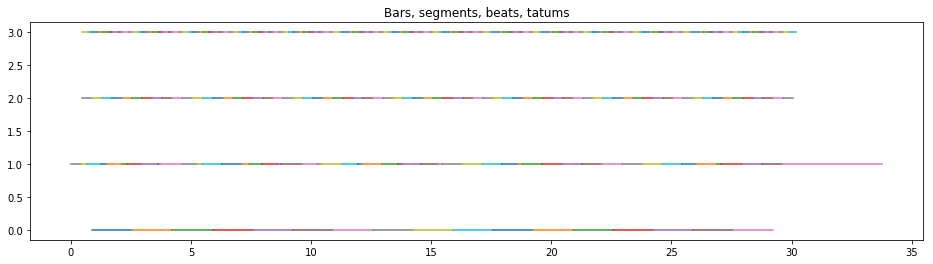

In [28]:
# get spotify analysis for specified track

%matplotlib inline
import spotipy
import spotipy.util as util
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,4)

track = '2bqfMrkx6iaCzJ6vXtAHsX'
#track = '50piV6SES6BqXrBldVW57I'

scope = 'user-library-read'
token = util.prompt_for_user_token('5gc3kt2m0fhoq1bnadvaxzzo9',scope,client_id='7d1eac2d7f7c441c8ddfe339296e2e00',client_secret='1032f5fd209c49d9a69dde6e39dafaad',redirect_uri='https://www.google.com/')
spotify = spotipy.Spotify(auth=token)
analysis=spotify.audio_analysis(track)
json = json.dumps(analysis)
f = open("c:/data/analysis_"+track+".json","w")
f.write(json)
f.close()

n_bars = len(analysis['bars'])
n_segments = len(analysis['segments'])
n_beats = len(analysis['beats'])
n_tatums = len(analysis['tatums'])

print n_bars,'bars, ', n_segments, 'segments,', n_beats, 'beats,', n_tatums, 'tatums'

bar_starts = [ k['start'] for k in analysis['bars'] ]
bar_ends = [ k['start']+k['duration'] for k in analysis['bars'] ]

segment_starts = [ k['start'] for k in analysis['segments'] ]
segment_ends = [ k['start']+k['duration'] for k in analysis['segments'] ]

beat_starts = [ k['start'] for k in analysis['beats'] ]
beat_ends = [ k['start']+k['duration'] for k in analysis['beats'] ]

tatum_starts = [ k['start'] for k in analysis['tatums'] ]
tatum_ends = [ k['start']+k['duration'] for k in analysis['tatums'] ]

plt.plot([bar_starts, bar_ends], [[0]*len(bar_starts), [0]*len(bar_starts)])

plt.plot([segment_starts, segment_ends], [[1]*len(segment_starts), [1]*len(segment_starts)])

plt.plot([beat_starts, beat_ends], [[2]*len(beat_starts), [2]*len(beat_starts)])

plt.plot([tatum_starts, tatum_ends], [[3]*len(tatum_starts), [3]*len(tatum_starts)])

plt.title('Bars, segments, beats, tatums');

